In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shopping_trend_df = pd.read_csv("shopping_trends.csv")

shopping_trend_df.tail()
shopping_trend_df.describe()
shopping_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

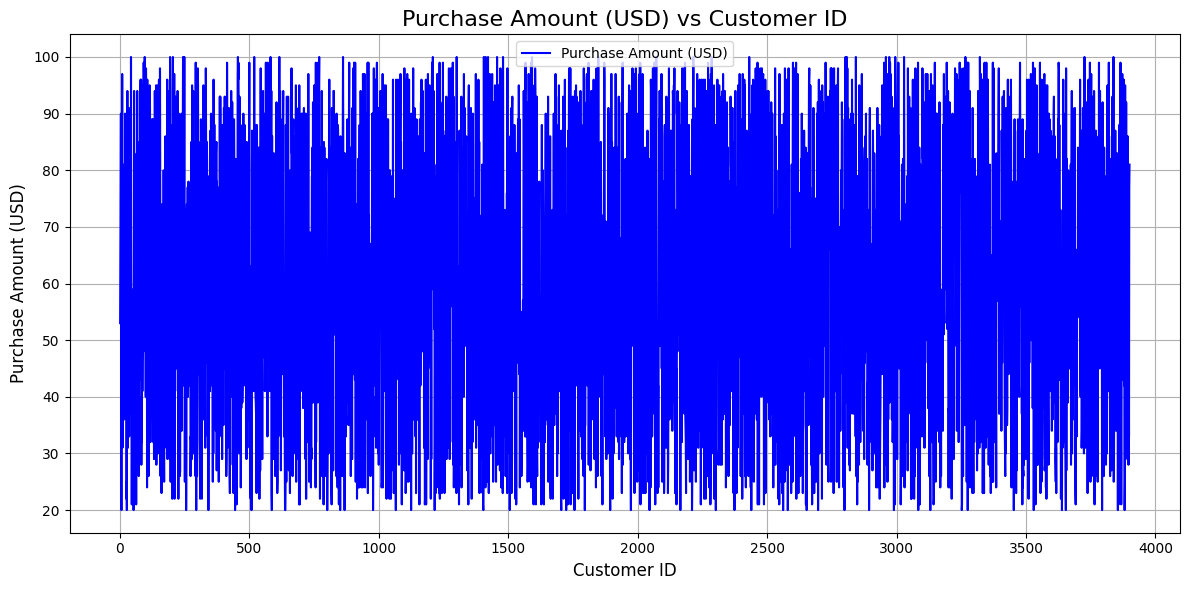

In [19]:
# Task 2: Basic Line Plot
plt.figure(figsize=(12, 6))
plt.plot(shopping_trend_df['Customer ID'], shopping_trend_df['Purchase Amount (USD)'], label="Purchase Amount (USD)", color='blue')
plt.title("Purchase Amount (USD) vs Customer ID", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

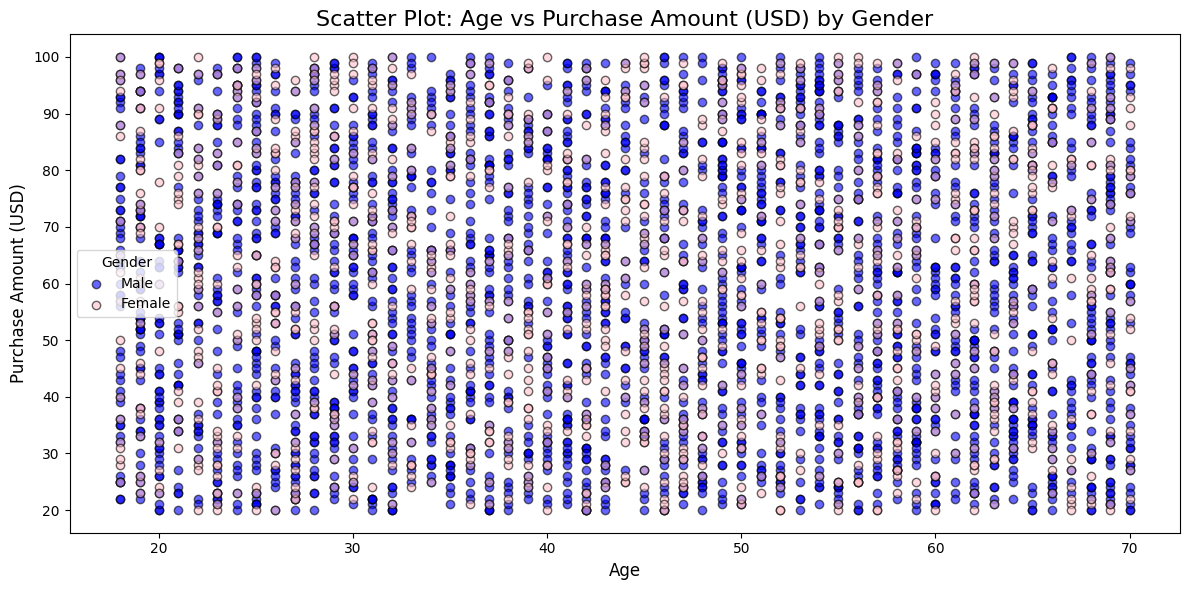

In [20]:
# Task 3: Scatter Plot
plt.figure(figsize=(12, 6))
colors = {'Male': 'blue', 'Female': 'pink'}
for gender in shopping_trend_df['Gender'].unique():
    gender_data = shopping_trend_df[shopping_trend_df['Gender'] == gender]
    plt.scatter(gender_data['Age'], gender_data['Purchase Amount (USD)'],
                color=colors[gender], label=gender, alpha=0.6, edgecolor='black')
plt.title("Scatter Plot: Age vs Purchase Amount (USD) by Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

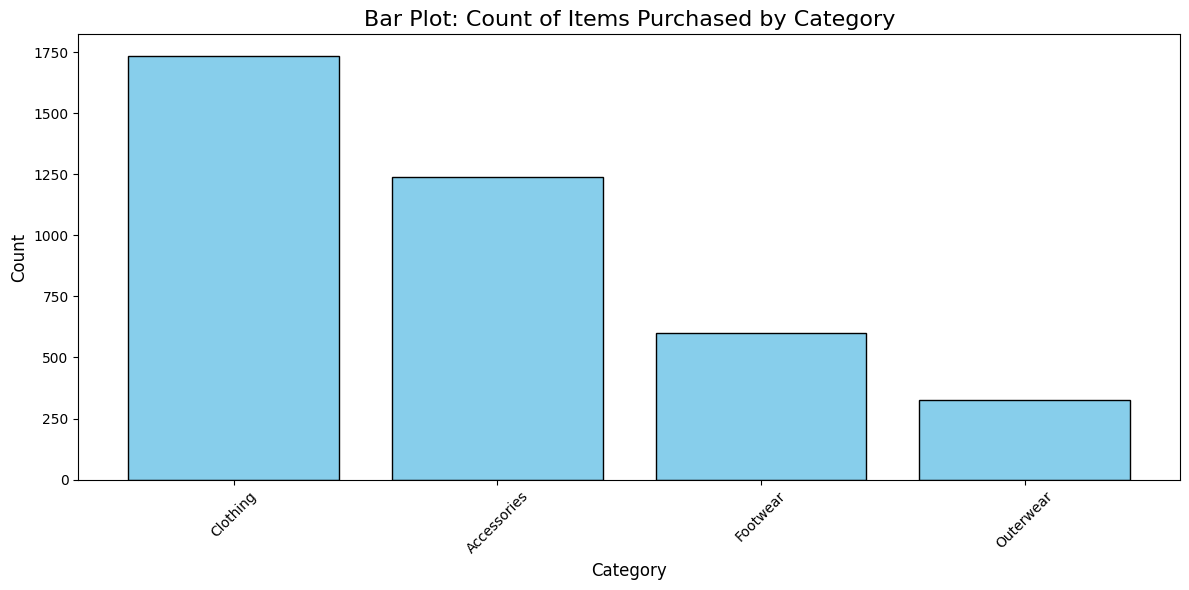

In [21]:
# Task 4: Bar Plot
plt.figure(figsize=(12, 6))
category_counts = shopping_trend_df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.title("Bar Plot: Count of Items Purchased by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

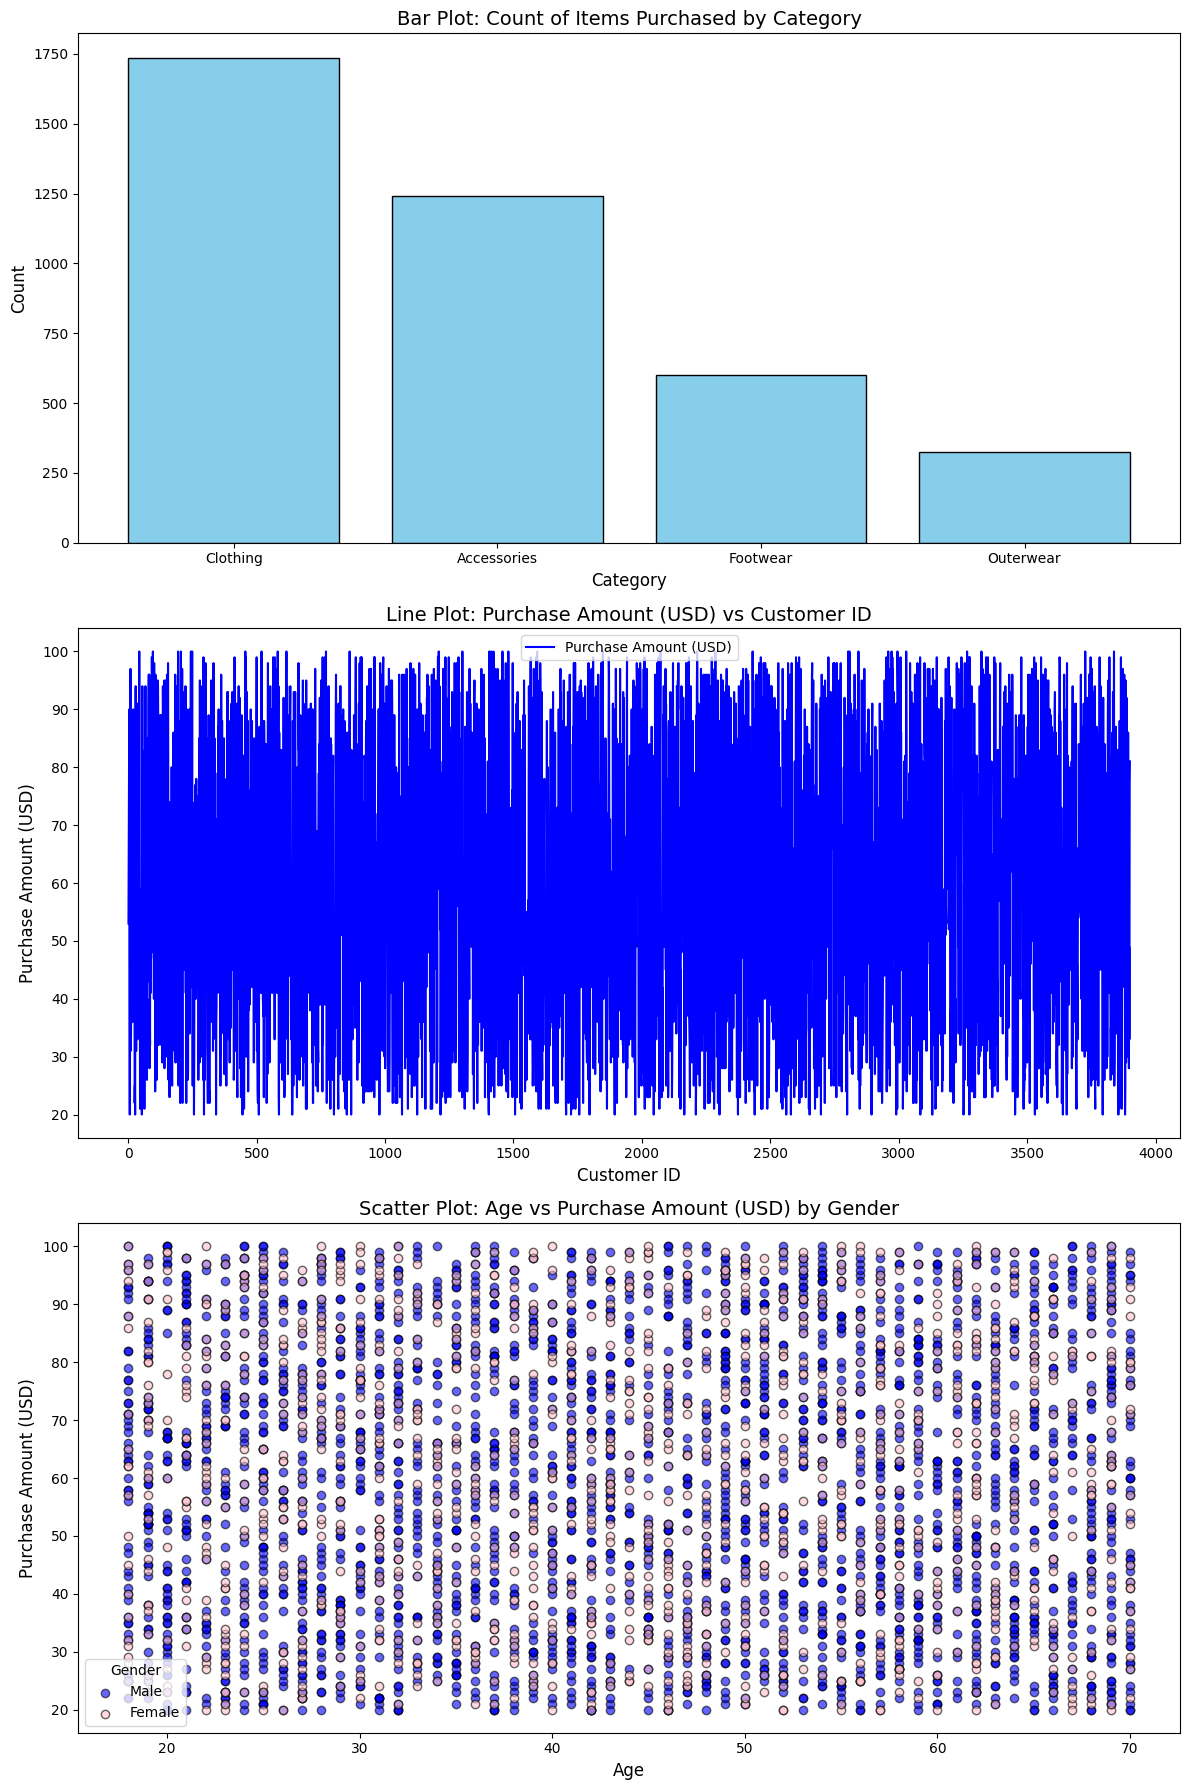

In [23]:
# Task 5: Subplots (Bar, Line, Scatter)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Bar Plot
axes[0].bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Bar Plot: Count of Items Purchased by Category", fontsize=14)
axes[0].set_xlabel("Category", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Line Plot
axes[1].plot(shopping_trend_df['Customer ID'], shopping_trend_df['Purchase Amount (USD)'], label="Purchase Amount (USD)", color='blue')
axes[1].set_title("Line Plot: Purchase Amount (USD) vs Customer ID", fontsize=14)
axes[1].set_xlabel("Customer ID", fontsize=12)
axes[1].set_ylabel("Purchase Amount (USD)", fontsize=12)
axes[1].legend()

# Scatter Plot
for gender in shopping_trend_df['Gender'].unique():
    gender_data = shopping_trend_df[shopping_trend_df['Gender'] == gender]
    axes[2].scatter(gender_data['Age'], gender_data['Purchase Amount (USD)'],
                    color=colors[gender], label=gender, alpha=0.6, edgecolor='black')
axes[2].set_title("Scatter Plot: Age vs Purchase Amount (USD) by Gender", fontsize=14)
axes[2].set_xlabel("Age", fontsize=12)
axes[2].set_ylabel("Purchase Amount (USD)", fontsize=12)
axes[2].legend(title="Gender")

plt.tight_layout()
plt.show()

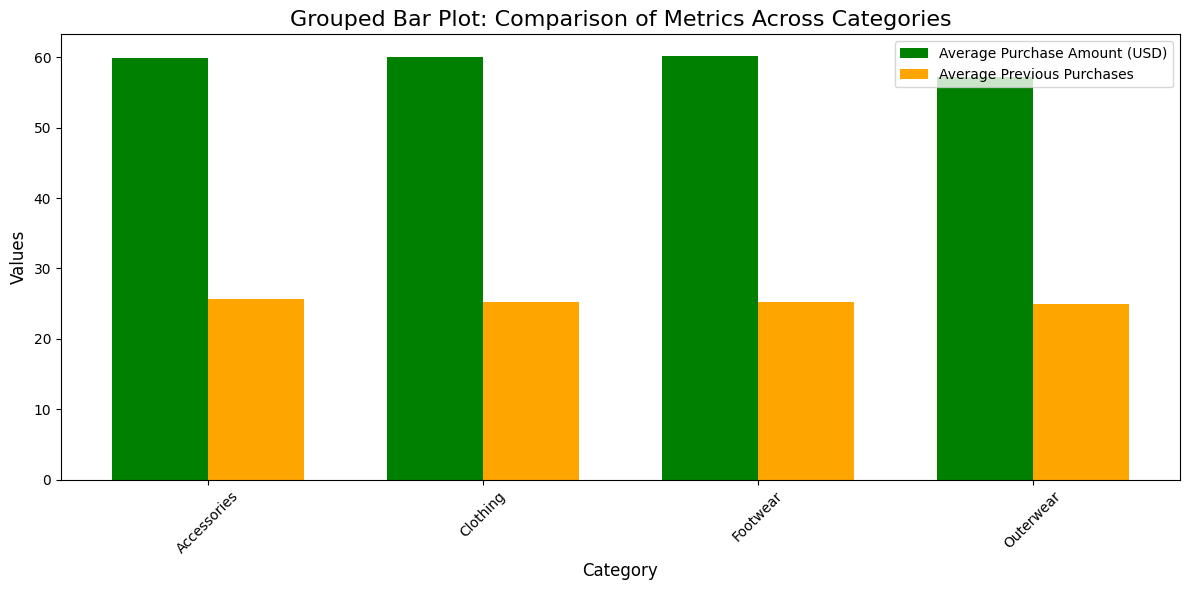

In [24]:
# Task 6: Grouped Bar Plot
grouped_data = shopping_trend_df.groupby('Category').agg({
    'Purchase Amount (USD)': 'mean',
    'Previous Purchases': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(grouped_data['Category']))

ax.bar(x, grouped_data['Purchase Amount (USD)'], width=bar_width, label='Average Purchase Amount (USD)', color='green')
ax.bar(x + bar_width, grouped_data['Previous Purchases'], width=bar_width, label='Average Previous Purchases', color='orange')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(grouped_data['Category'], rotation=45)
ax.set_title("Grouped Bar Plot: Comparison of Metrics Across Categories", fontsize=16)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Values", fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

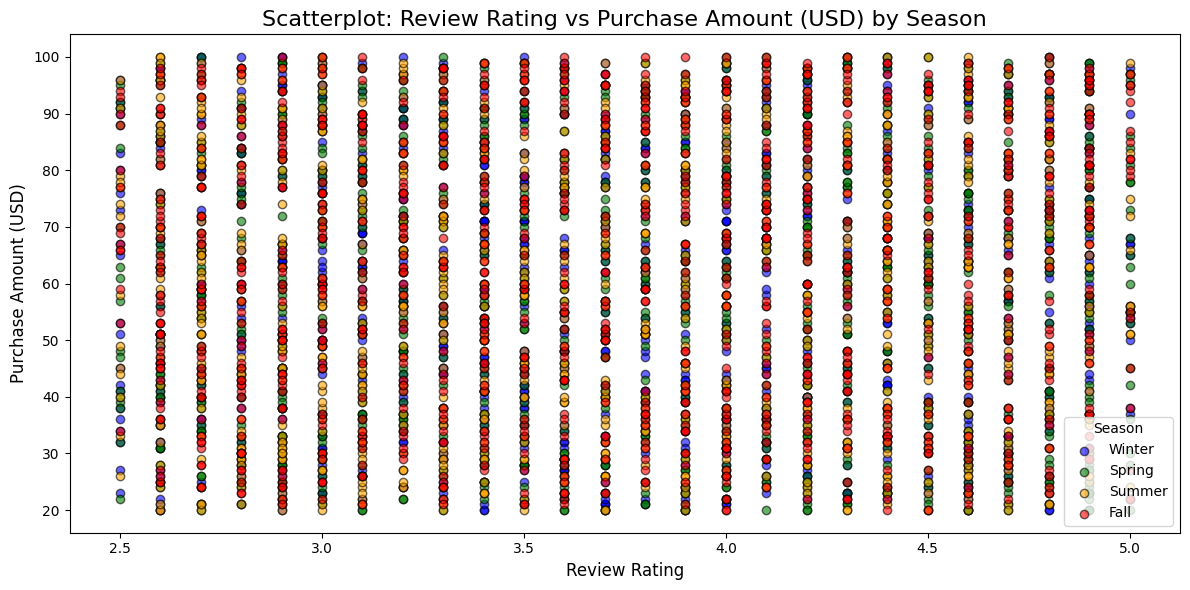

In [25]:
# Task 7: Scatterplot with Groups
plt.figure(figsize=(12, 6))
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'orange', 'Fall': 'red'}
for season in shopping_trend_df['Season'].unique():
    season_data = shopping_trend_df[shopping_trend_df['Season'] == season]
    plt.scatter(season_data['Review Rating'], season_data['Purchase Amount (USD)'],
                color=season_colors[season], label=season, alpha=0.6, edgecolor='black')
plt.title("Scatterplot: Review Rating vs Purchase Amount (USD) by Season", fontsize=16)
plt.xlabel("Review Rating", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.legend(title="Season")
plt.tight_layout()
plt.show()